# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 0.20
- matplotlib 3.5.2
- scipy 1.4
- hdbscan 0.8.33


### Vamos a trabajar con un dataset de clusters no globulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

dataset = datasets.make_moons(n_samples=1000, noise=0.05) # usar noise 0.2 para fusionar los clusters
X, _ = dataset

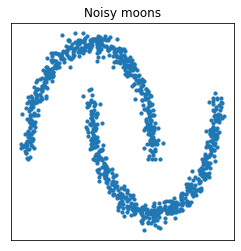

In [2]:
plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xticks(())
plt.yticks(())
plt.show()

### Ahora calculamos la kdist plot para MinPts=5

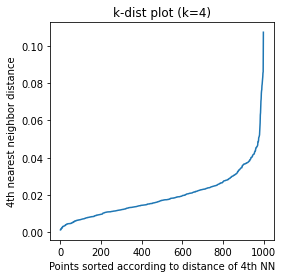

In [3]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 4th NN")
plt.ylabel("4th nearest neighbor distance")
plt.title("k-dist plot (k=4)")
plt.plot(distances)
plt.show()

### El k-dist plot nos muestra que si queremos clusterizar muchos datos, debemos usar un EPS ~ [0.06 - 0.08]

In [4]:
from sklearn import cluster

dbscan = cluster.DBSCAN(eps=0.08, min_samples=5)
model = dbscan.fit(X)

- eps: The maximum Euclidean distance between two samples for one to be considered as in the neighborhood of the other (def: 0.5)

- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. (def: 5)

### Veamos como quedaron los clusters

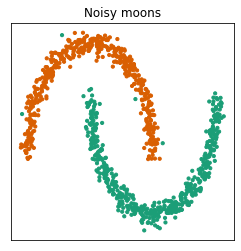

In [5]:
y_pred = model.labels_.astype(int) # en esta parte vemos en qué cluster quedó cada dato

def colour(x):
    return plt.cm.Dark2(x)

colors = list(map(colour,y_pred))

plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors)
plt.xticks(())
plt.yticks(())
plt.show()

### Ahora probamos HDBSCAN

In [6]:
!pip3 install hdbscan

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: orange3-imageanalytics 0.8.0 has a non-standard dependency specifier numpy>=1.16.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of orange3-imageanalytics or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: tensorflow-examples 907a3e7466aa72345c983b596cba58b255f2b1f7- has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of tensorflow-examples or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible rep

https://github.com/scikit-learn-contrib/hdbscan

In [7]:
import hdbscan

In [8]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

In [9]:
clusterer.fit(X)

HDBSCAN(gen_min_span_tree=True)

In [10]:
cluster_labels = clusterer.fit_predict(X)

In [11]:
cluster_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

<AxesSubplot:>

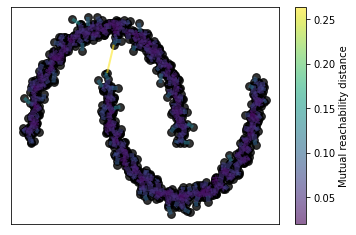

In [12]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=60, edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

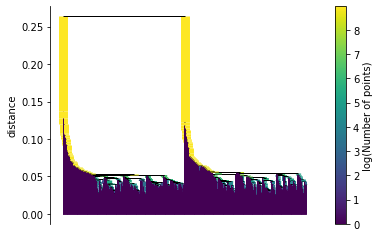

In [13]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

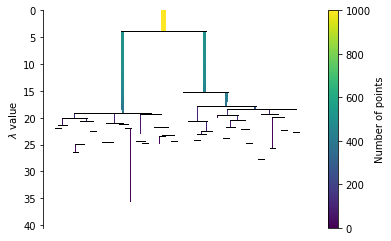

In [14]:
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

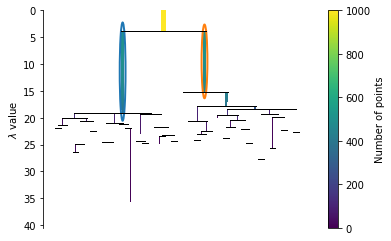

In [15]:
import seaborn as sns

clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())